# DECISION TREE 

# Importing Modules and DataFrame

In [19]:
import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [20]:
df2 = pd.read_csv('Pre-processed Data.csv')
df2.head()

,card,reports,income,share
0,1,0,4.5200,0.033270
1,1,0,2.4200,0.005217
2,1,0,4.5000,0.004156
3,1,0,2.5400,0.065214
4,1,0,9.7867,0.067051


In [21]:
df2.corr()

,card,reports,income,share
card,1.000000,-0.452577,0.094308,0.388028
reports,-0.452577,1.000000,0.011023,-0.159011
income,0.094308,0.011023,1.000000,-0.054429
share,0.388028,-0.159011,-0.054429,1.000000


In [22]:
X2 = df2.drop('card',axis=1)
X2.head()

# Indpendent Variabales

,reports,income,share
0,0,4.5200,0.033270
1,0,2.4200,0.005217
2,0,4.5000,0.004156
3,0,2.5400,0.065214
4,0,9.7867,0.067051


In [23]:
y2 = df2.card
y2.head()

# Target Variable

0    1
1    1
2    1
3    1
4    1
Name: card, dtype: int64

In [24]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.25, random_state=101)

In [25]:
dtree2 = DecisionTreeClassifier(random_state = 100,max_depth=3,min_samples_leaf=3)
dtree2.fit(X2_train,y2_train)

score2 = dtree2.score(X2_train,y2_train)*100
print ("\nScore:",score2)


Score: 98.48331648129424


In [26]:
pred2 = dtree2.predict(X2_test)
pred2[0:5]

array([1, 1, 1, 1, 1])

In [27]:
pred_proba2 = dtree2.predict_proba(X2_test)
pred_proba2[:5]

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [28]:
pd.crosstab(index=y2_test,columns=pred2,rownames = ["Actual Value"],
           colnames = ["Predicted Value"])

Predicted Value,0,1
Actual Value,,
0,64,0
1,9,257


In [29]:
# Precision = TP/(TP + FP)
# Precision measures how many of the samples 
# predicted as positive are actually positive
# Precision is also known as positive predictive value (PPV)

# Recall = TP/(TP + FN)
# measures how many of the positive samples are captured
# by the positive predictions:
# Other names for recall are sensitivity, hit rate,
# or true positive rate (TPR).

# F1-score = 2 x (precision x recall)/(precision + recall)
# f-score or f-measure, which is with the harmonic mean of
# precision and recall

print(metrics.classification_report(y2_test,pred2))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93        64
           1       1.00      0.97      0.98       266

   micro avg       0.97      0.97      0.97       330
   macro avg       0.94      0.98      0.96       330
weighted avg       0.98      0.97      0.97       330



In [30]:
accuracy_dtr2 = metrics.accuracy_score(y2_test,pred2)*100
print("Accurate Score of this model: %2.5f"%accuracy_dtr2)

Accurate Score of this model: 97.27273


In [33]:
print("MAE: ", metrics.mean_absolute_error(y2_test,pred2))
print("MSE: ",metrics.mean_squared_error(y2_test,pred2))
print("RMSE: ",np.sqrt(metrics.mean_squared_error(y2_test,pred2)))

MAE:  0.02727272727272727
MSE:  0.02727272727272727
RMSE:  0.1651445647689541


In [35]:
with open("dtree2_train.txt", "w") as f:
    f = tree.export_graphviz(dtree2, out_file=f)

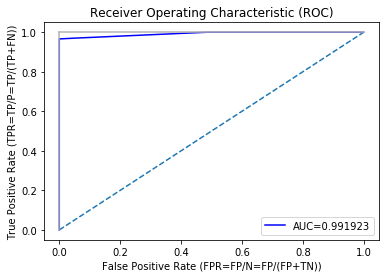

In [36]:
# Plot Receiving Operating Characteristic Curve
# Create true and false positive rates

y2_score = dtree2.predict_proba(X2_test)[:,1]
false_positive_rate, true_positive_rate, threshold = metrics.roc_curve(y2_test, y2_score)

# Plot ROC curve
plt.title('Receiver Operating Characteristic (ROC)')
roc_auc = metrics.auc(false_positive_rate,true_positive_rate)
plt.plot(false_positive_rate, true_positive_rate,'b',label="AUC=%f"%roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7")
plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate (TPR=TP/P=TP/(TP+FN))')
plt.xlabel('False Positive Rate (FPR=FP/N=FP/(FP+TN))')
plt.show()